# Initial Data Analysis and Statistical Visualizations

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/Users/falco/Downloads/DM1 Project/baseball.csv")

In [3]:
print(df.columns)

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')


We can split the stats into 3 groups:  
**Group 1.** Offensive stats: **OBP, SLG, BA**  
**Group 2.** Defensive stats: **OOBP, OSLG**  
**Group 3:** "Dependent" stats: **RS, RA, W** 

## Offensive Stats

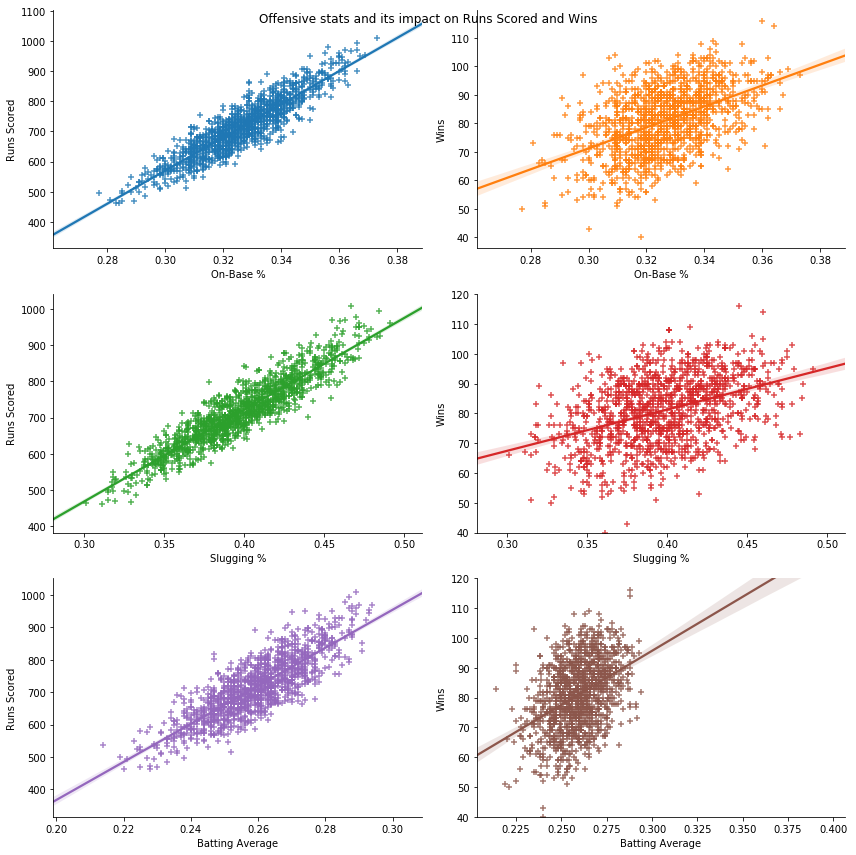

In [4]:
fig = plt.figure(figsize=(12,12))
fig.suptitle("Offensive stats and its impact on Runs Scored and Wins")
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.regplot(x="OBP", y="RS", data=df, scatter=True, marker="+", ax=ax1)
sns.regplot(x="OBP", y="W", data=df, scatter=True, marker="+", ax=ax2)
sns.regplot(x="SLG", y="RS", data=df, scatter=True, marker="+", ax=ax3)
sns.regplot(x="SLG", y="W", data=df, scatter=True, marker="+", ax=ax4)
sns.regplot(x="BA", y="RS", data=df, scatter=True, marker="+", ax=ax5)
sns.regplot(x="BA", y="W", data=df, scatter=True, marker="+", ax=ax6)
ax1.set_xlabel("On-Base %")
ax1.set_ylabel("Runs Scored")
ax2.set_xlabel("On-Base %")
ax2.set_ylabel("Wins")
ax3.set_xlabel("Slugging %")
ax3.set_ylabel("Runs Scored")
ax4.set_xlabel("Slugging %")
ax4.set_ylabel("Wins")
ax5.set_xlabel("Batting Average")
ax5.set_ylabel("Runs Scored")
ax6.set_xlabel("Batting Average")
ax6.set_ylabel("Wins")
ax4.set_ylim([40,120])
ax6.set_ylim([40,120])
sns.despine()
plt.tight_layout()
plt.show()

It can been seen that basic offensive stats are definitely correlated with Runs Scored but necessarily with Wins.

## Defensive Stats

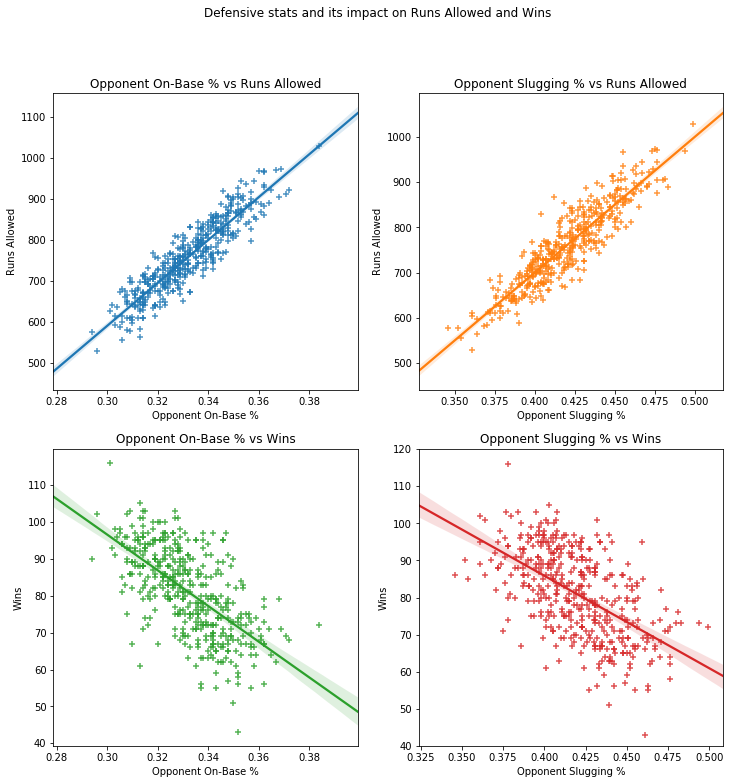

In [5]:
fig = plt.figure(figsize=(12,12))
fig.suptitle("Defensive stats and its impact on Runs Allowed and Wins")
ax1 = fig.add_subplot(2,2,1)
ax1.set_title("Opponent On-Base % vs Runs Allowed")
ax2 = fig.add_subplot(2,2,2)
ax2.set_title("Opponent Slugging % vs Runs Allowed")
ax3 = fig.add_subplot(2,2,3)
ax3.set_title("Opponent On-Base % vs Wins")
ax4 = fig.add_subplot(2,2,4)
ax4.set_title("Opponent Slugging % vs Wins")
sns.regplot(x="OOBP", y="RA", data=df, scatter=True, marker="+", ax=ax1)
sns.regplot(x="OSLG", y="RA", data=df, scatter=True, marker="+", ax=ax2)
sns.regplot(x="OOBP", y="W", data=df, scatter=True, marker="+", ax=ax3)
sns.regplot(x="OSLG", y="W", data=df, scatter=True, marker="+", ax=ax4)
ax1.set_xlabel("Opponent On-Base %")
ax1.set_ylabel("Runs Allowed")
ax2.set_xlabel("Opponent Slugging %")
ax2.set_ylabel("Runs Allowed")
ax3.set_xlabel("Opponent On-Base %")
ax3.set_ylabel("Wins")
ax4.set_xlabel("Opponent Slugging %")
ax4.set_ylabel("Wins")
ax4.set_ylim([40,120])
plt.show()

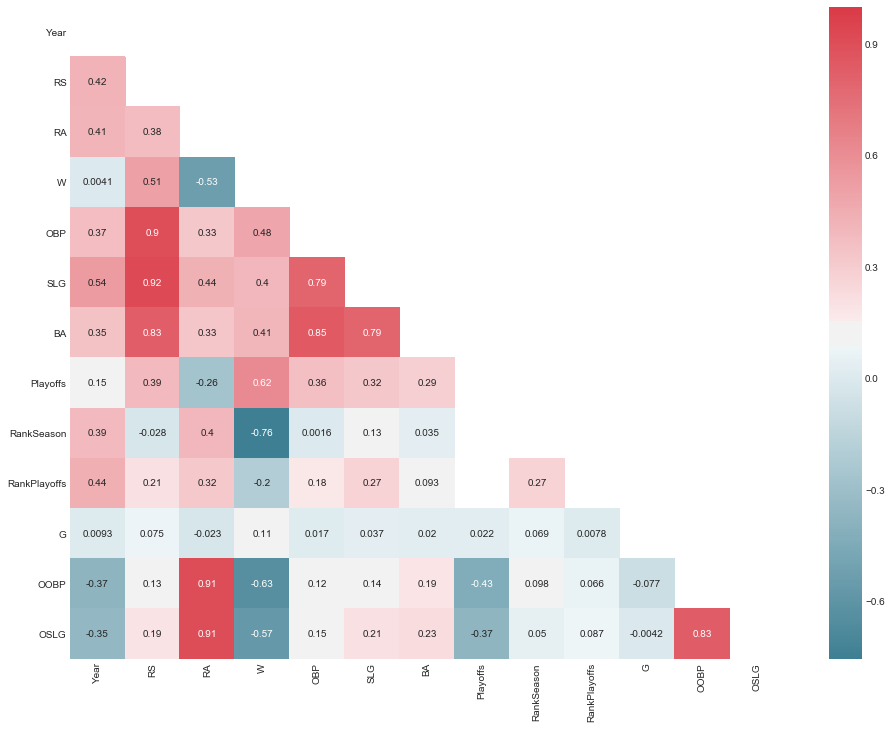

In [6]:
corr_df = df.corr()
fig = plt.figure(figsize=(16,12))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set_style("white")
sns.heatmap(corr_df, mask=mask, cmap=cmap, annot=True)

This is just a cool graph heat map that color codes the strength of correlation.

You can see the 3 offensive stats we decided to plot are highly correlated with Runs Scored and also OOBP/OSLG with Runs Allowed

## Shifting to Team Perspective

To allow easier viewing we will consolidate the graphs generated to the teams with the most playoff appearances. 

All the teams selected were present in every season and appear equal amount of times in the dataset.

In [7]:
teams = ['BOS', 'NYY', 'HOU', 'CHC', 'NYM', 'LAD']
exp_df = df.loc[df['Team'].isin(teams)]
exp_df.head(6)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
10,HOU,NL,2012,583,794,55,0.302,0.371,0.236,0,NaN,NaN,162,0.337,0.427
13,LAD,NL,2012,637,597,86,0.317,0.374,0.252,0,NaN,NaN,162,0.310,0.364
17,NYM,NL,2012,650,709,74,0.316,0.386,0.249,0,NaN,NaN,162,0.315,0.401
18,NYY,AL,2012,804,668,95,0.337,0.453,0.265,1,3.0,3.0,162,0.311,0.419


In [8]:
playoff = {}
for team in teams:
    team_playoff = exp_df.loc[exp_df['Team'] == team, 'Playoffs'].sum()
    playoff[team] = team_playoff
print(playoff)

{'BOS': 13, 'NYY': 23, 'HOU': 8, 'CHC': 6, 'NYM': 7, 'LAD': 14}


In [9]:
import squarify

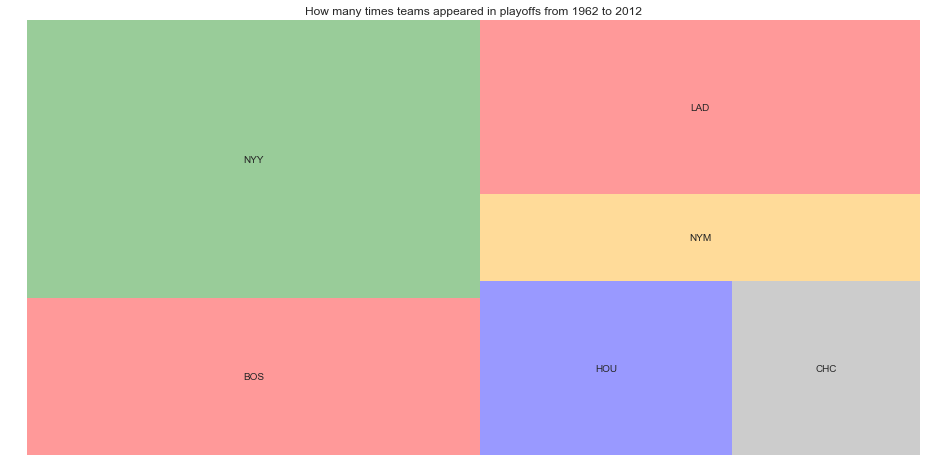

In [10]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
ax = squarify.plot(sizes=playoff.values(), label=playoff.keys(), \
                    color=["red","green","blue", "grey", "orange"], alpha=.4 )
plt.axis('off')
plt.title('How many times teams appeared in playoffs from 1962 to 2012')
plt.show()

In [11]:
teams = ['BOS', 'NYY', 'HOU', 'CHC', 'NYM', 'LAD']
exp_df = df.loc[df['Team'].isin(teams)]
exp_df.head(6)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
10,HOU,NL,2012,583,794,55,0.302,0.371,0.236,0,NaN,NaN,162,0.337,0.427
13,LAD,NL,2012,637,597,86,0.317,0.374,0.252,0,NaN,NaN,162,0.310,0.364
17,NYM,NL,2012,650,709,74,0.316,0.386,0.249,0,NaN,NaN,162,0.315,0.401
18,NYY,AL,2012,804,668,95,0.337,0.453,0.265,1,3.0,3.0,162,0.311,0.419


In [12]:
obp_mean = df['OBP'].mean()
slg_mean = df['SLG'].mean()
ba_mean = df['BA'].mean()
oobp_mean = df['OOBP'].mean()
oslg_mean = df['OSLG'].mean()

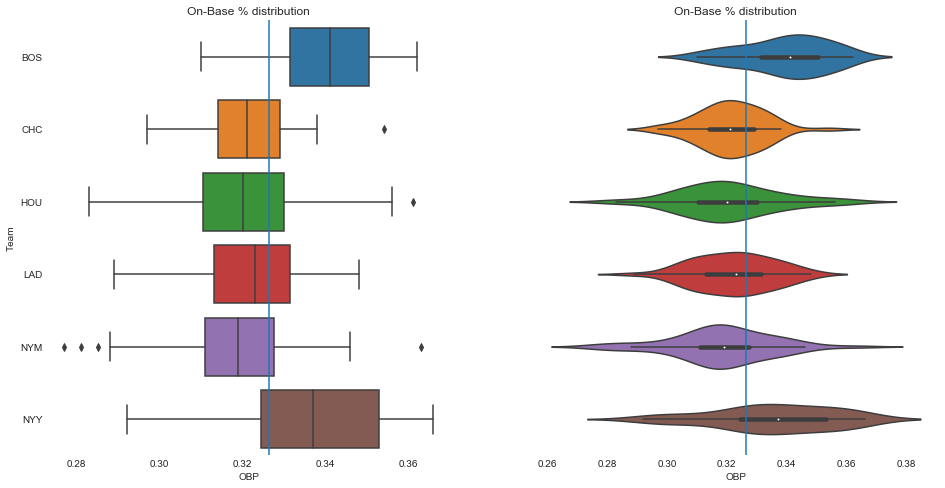

In [13]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x=exp_df['OBP'], y=exp_df['Team'], ax=ax1)
sns.violinplot(x=exp_df['OBP'], y=exp_df['Team'], ax=ax2)
ax1.set_title("On-Base % distribution")
ax2.set_title("On-Base % distribution")
ax1.axvline(obp_mean)
ax2.axvline(obp_mean)
ax2.yaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.show()

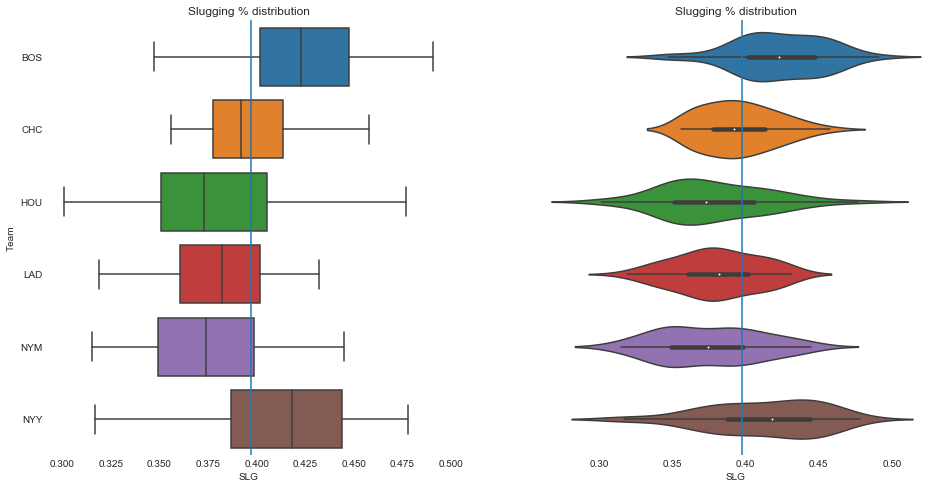

In [14]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x=exp_df['SLG'], y=exp_df['Team'], ax=ax1)
sns.violinplot(x=exp_df['SLG'], y=exp_df['Team'], ax=ax2)
ax1.set_title("Slugging % distribution")
ax2.set_title("Slugging % distribution")
ax1.axvline(slg_mean)
ax2.axvline(slg_mean)
ax2.yaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.show()

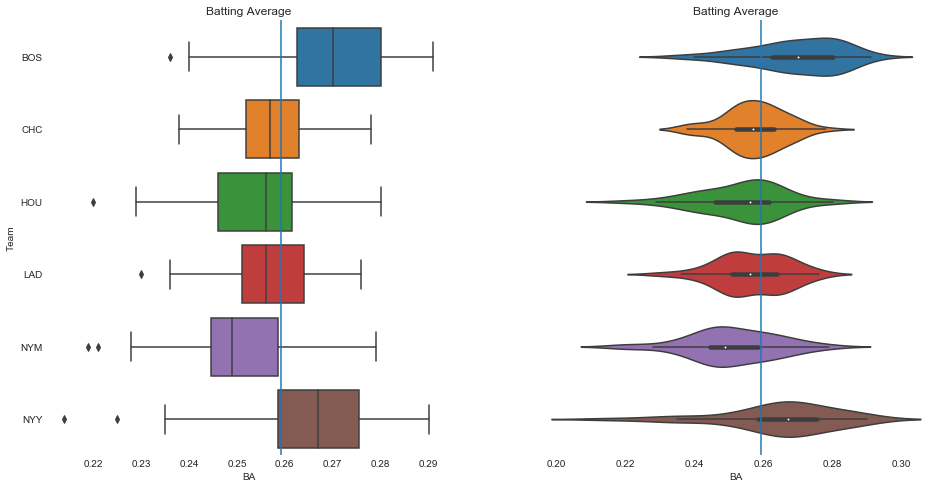

In [15]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x=exp_df['BA'], y=exp_df['Team'], ax=ax1)
sns.violinplot(x=exp_df['BA'], y=exp_df['Team'], ax=ax2)
ax1.set_title("Batting Average")
ax2.set_title("Batting Average")
ax1.axvline(ba_mean)
ax2.axvline(ba_mean)
ax2.yaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.show()

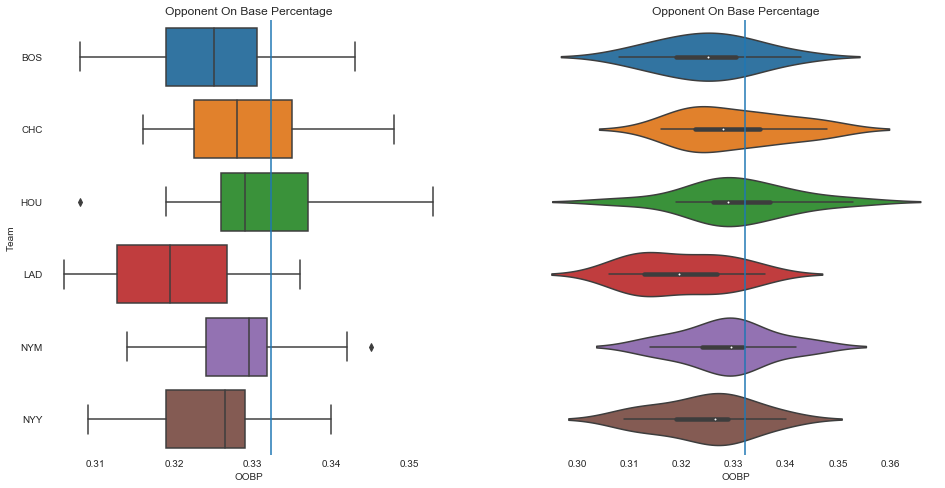

In [16]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x=exp_df['OOBP'], y=exp_df['Team'], ax=ax1)
sns.violinplot(x=exp_df['OOBP'], y=exp_df['Team'], ax=ax2)
ax1.set_title("Opponent On Base Percentage")
ax2.set_title("Opponent On Base Percentage")
ax1.axvline(oobp_mean)
ax2.axvline(oobp_mean)
ax2.yaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.show()

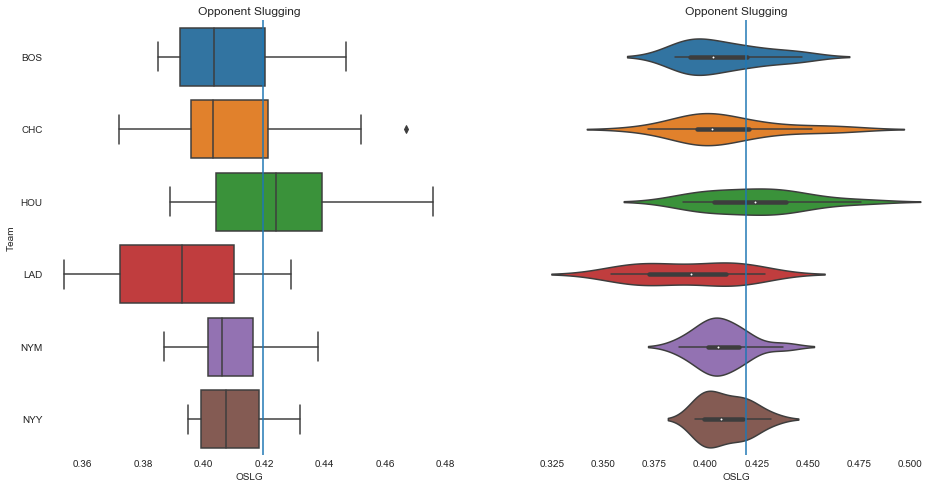

In [17]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x=exp_df['OSLG'], y=exp_df['Team'], ax=ax1)
sns.violinplot(x=exp_df['OSLG'], y=exp_df['Team'], ax=ax2)
ax1.set_title("Opponent Slugging")
ax2.set_title("Opponent Slugging")
ax1.axvline(oslg_mean)
ax2.axvline(oslg_mean)
ax2.yaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.show()